In [33]:
### IMPORT PACKAGES
from time import sleep
import numpy as np
from qcodes.dataset import do0d, load_or_create_experiment
from qcodes.instrument import Instrument
from qcodes.instrument_drivers.stanford_research import SR830
from qcodes.validators import Numbers
import time
import matplotlib.pyplot as plt

In [45]:
### DEFINE FREQUENCY TO BE MEASURED
freq_in = 10

In [37]:
### CONNECT TO LOCK-IN
lockin = SR830('lockin', 'GPIB0::1::INSTR')

Connected to: Stanford_Research_Systems SR830 (serial:s/n83931, firmware:ver1.07) in 0.10s


In [50]:
### SET UP LOCK-IN PARAMS
V = 5 # what determines this? between 0.004 and 5.0
freq = freq_in # should match frequency of input source to be measured 
phi = 0

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

time_constants = np.array(
    [0.3, 1, 3, 10, 10000.0, 0.0001, 30, 300, 30000.0, 3000.0, 3e-05, 0.03, 0.1, 0.0003, 100, 1e-05, 1000.0, 0.01, 0.003, 0.001])
lockin.reference_source('internal') # set reference to internal 
lockin.time_constant(find_closest(time_constants,2 / freq_in)) # int. time should be longer than one full oscillation cycle
lockin.set('amplitude', V) # set reference amp
lockin.set('frequency', freq)
lockin.set('phase', phi) 

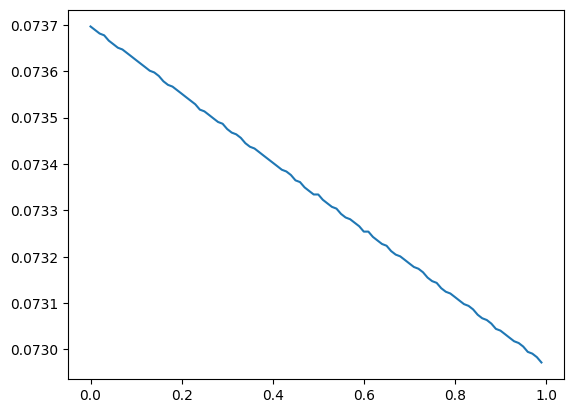

In [52]:
Vs = []
ts = []
dt =0.01
t = 0
t_sleep = 0.01
lockin.time_constant(3000)
while t < 1:
    V = lockin.R()
    Vs.append(V)
    time.sleep(t_sleep)
    ts.append(t)
    t += dt

plt.plot(ts, Vs)

In [14]:
### SET TIME CONSTANT BASED ON SOURCE PERIOD 
# integration constan|t should be larger than full period 

In [36]:
lockin.close()

In [17]:
### to do
'''
- why is sqrt wave not working?
- figure out how to set time constant (2 * 1 / freq_in)
- sensitivity?
'''
lockin.time_constant(1)

In [54]:
lockin.sensitivity(0.5)